# Project 2: Missing Data Imputation

**Author: Bartosz Grabek**

Requirements:
- `numpy`
- `pandas`
- `matplotlib`
- `mercury`
- `scikitlearn`

Intented usage:

- Run `mercury run` in terminal

In [2]:
# to serve this presentation in a browser, uncomment the line below and run the cell
# !jupyter nbconvert --to slides --post serve DEV_Bartosz_Grabek_PRO2.ipynb

## Imports and Setup

In [3]:
from IPython.display import Markdown, IFrame, Latex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import mercury as mr

show_code = mr.Checkbox(label="Show code", value=False)

app = mr.App(title="DEV Project 2: Missing Data Imputation",
             description="""This notebook shows the impact of missing data on model performance and 
             investigates popular techniques of data imputation to mitigate impact of missing data on model performance""",
             show_code=show_code.value,
             show_sidebar=True)

# add text widget for seed
seed_widget = mr.Text(value="42", label="Random Seed", rows=1)

mercury.Checkbox

mercury.App

mercury.Text

In [6]:
RANDOM_SEED = 42
seed = seed_widget.value
if seed != "":
    try:
        RANDOM_SEED = int(seed)
    except:
        RANDOM_SEED = abs(hash(seed))
print(RANDOM_SEED)

42


## Project 2
### Missing Data Imputation

**By Bartosz Grabek**

### Multivariate Imputation by Chained Equations (MICE)

- statistical method combining results from multiple imputations to produce the final dataset

- main goal of MICE is to preserve the relationship between variables and **reduce bias** introduced during imputation

- Pros ✅: 
    - robust and flexible method for handling missing data
    - preserves relationships
    - reduces bias
    - good for both missing at-random and not-at-random
    - good especially when large amounts of data are missing

- Cons ❌: 
    - computationally expensive, not recommeneded for large datasets

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/

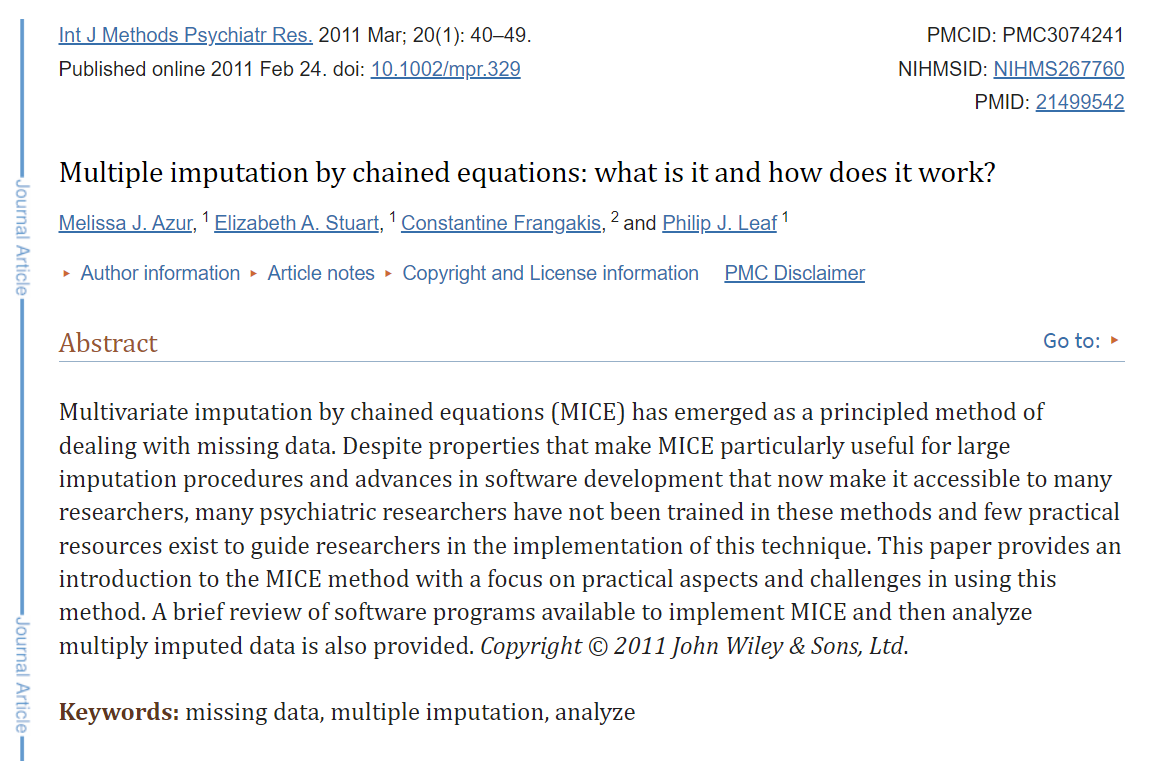

### Intuition behind MICE

https://www.machinelearningplus.com/machine-learning/mice-imputation/

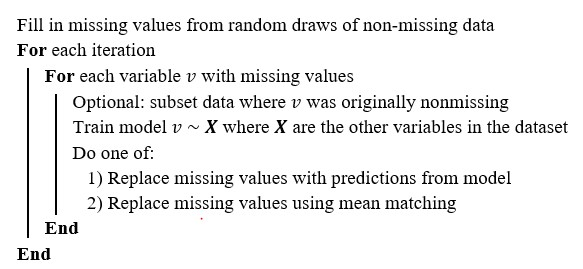

### MICE example with 3 features (simplified)

Assume: $X = [X_1, X_2, X_3]^{'}$, $Y$

**Algorithm**
1. Choose number of iterations $k$ and create $k$ many copies of the raw dataset
2. For each $X_1$, $X_2$, $X_3$ replace the missing values with an approximate (eg. feature mean), temporary replacement
3. For the specific column you want to impute (eg. $X_1$) change the imputed value back to missing
4. Build a regression model to predict $X_1$ using $X_2$ and $X_3$. For this model only the non-missing rows of $X_1$ are included.
Use this model to predict missing values in A
5. Repeat steps 2-4 for columns $X_2$ and $X_3$

Completing 1 round of predictions for $X_1$, $X_2$, $X_3$ forms 1 iterations (in total $k$).
It is called **chained** because each iteration relies on the previous one.

### MICE in scikit-learn (`IterativeImputer`)

In [7]:
from IPython.display import IFrame

IFrame(src="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html", width="100%", height=500)

### Dataset

Wolberg, William, Mangasarian, Olvi, Street, Nick, and Street, W. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
Markdown(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

### Sample

In [11]:
X = data["data"]
y = data["target"]

In [12]:
mr.NumberBox([
    mr.NumberBox(data=X.shape[0], title="# of observations"),
    mr.NumberBox(data=X.shape[1], title="# of features"),
    mr.NumberBox(data=f"{round((len(y)-sum(y)) / len(y), 2)*100}%", title="0-to-1 ratio"),
])

In [13]:
df_cancer = pd.DataFrame(X, columns=data["feature_names"])
df_cancer["target"] = y
df_cancer.head(5).transpose()

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


# 📢 Turn on "Show code"

In [14]:
print("Everything works fine!")

Everything works fine!


### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the baseline model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print(accuracy_score(rfc.predict(X_test), y_test))

0.9649122807017544


### Introducing missing values

In [18]:
missing_ratio = 0.4
num_missing = int(X_train.size * missing_ratio)
imputation_method = "Simple imputation (mean)"

In [19]:
missing_ratio_slider = mr.Slider(value=0.4, min=0, max=1, label="Missing Data", step=0.01)
imputation_method = mr.Select(label="Imputation method", value="Simple imputation (mean)", 
                              choices=["Simple imputation (mean)", 
                                       "Simple imputation (median)", 
                                       "Simple imputation (mode)"])

mercury.Slider

mercury.Select

In [20]:
def introduce_missing_data(X, missing_ratio=missing_ratio_slider.value):
    num_missing = int(X.size * missing_ratio)
    missing_indices = np.random.choice(X.size, num_missing, replace=False)

    X_missing = X.copy()
    X_missing.flat[missing_indices] = np.nan

    X_missing = pd.DataFrame(X_missing)
    return X_missing

In [21]:
X_train_missing = introduce_missing_data(X_train)

### Visualising missing data

In [22]:
import seaborn as sns

def plot_missing_data():
    plt.figure(figsize=(18,8))
    colours = ['#34495E', 'seagreen'] 
    sns.heatmap(X_train_missing.isnull(), cmap=sns.color_palette(colours), cbar=False)
    plt.title(f"Missing Data ({missing_ratio*100}%)", fontdict={"size": 16})
    plt.xlabel('Features')  # Add x-axis title
    plt.ylabel('Observations')      # Add y-axis title
    plt.show()

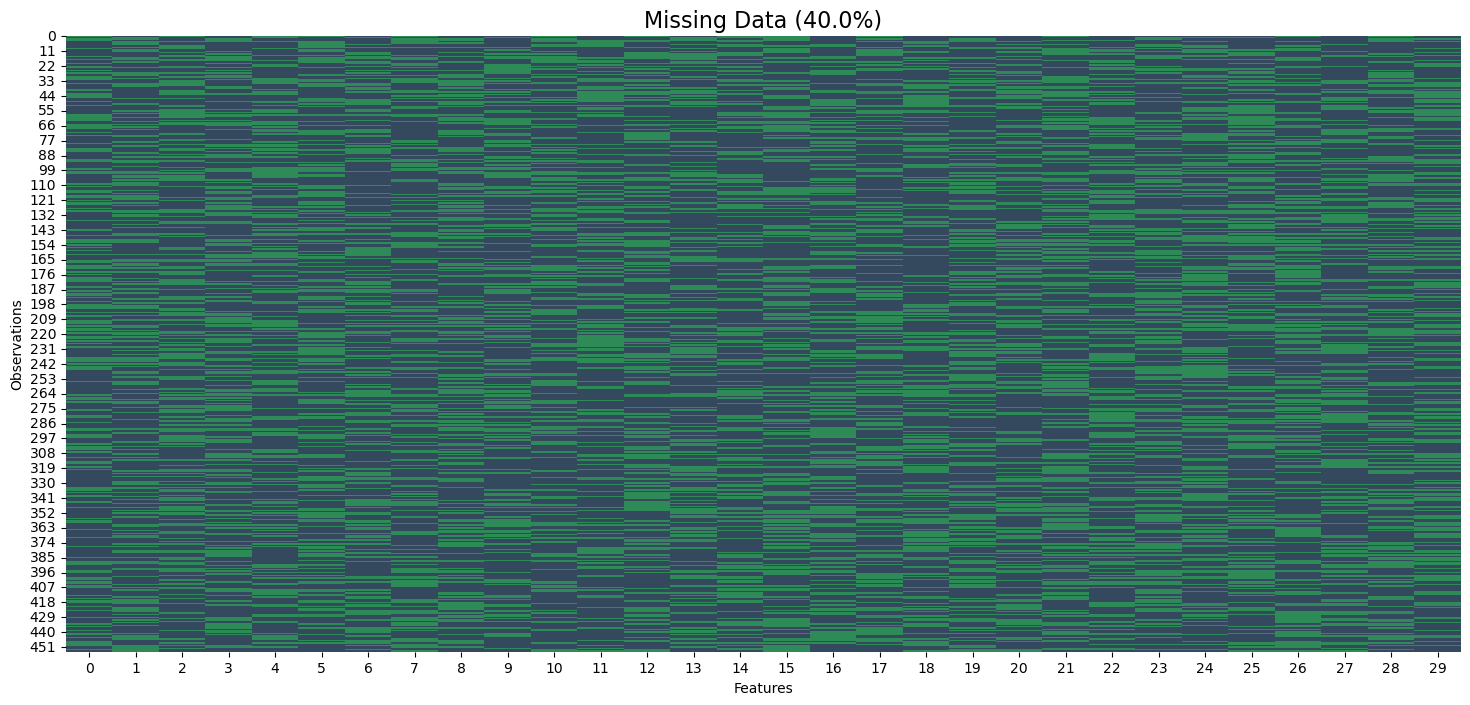

In [23]:
plot_missing_data()

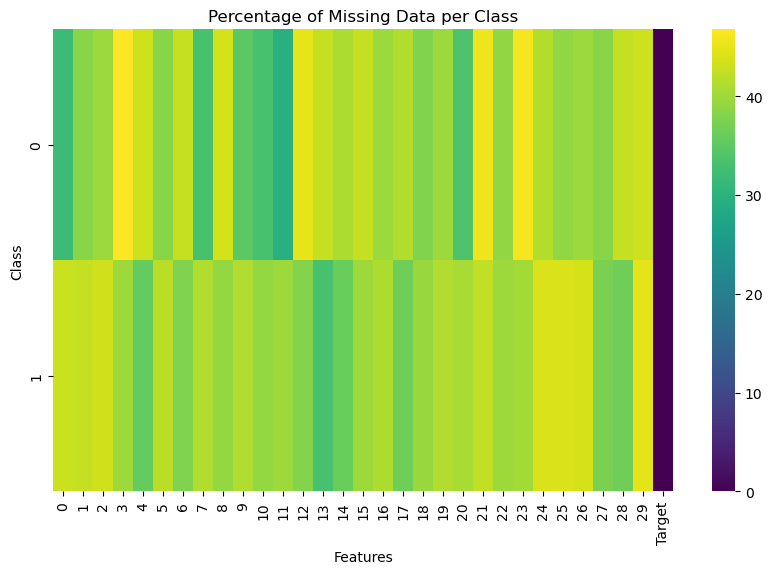

In [24]:
df = pd.DataFrame(X_train_missing)
df['Target'] = y_train
missing_percentage_per_class = df.groupby('Target').apply(lambda x: x.isnull().mean() * 100)

# Plot the missing data per class
plt.figure(figsize=(10, 6))
sns.heatmap(missing_percentage_per_class, cmap='viridis', fmt='.1f')
plt.title('Percentage of Missing Data per Class')
plt.xlabel('Features')
plt.ylabel('Class')
plt.show()

### Missing Data Imputation

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
imputer = IterativeImputer(random_state=RANDOM_SEED)
X_train_imputed = imputer.fit_transform(X_train_missing)
# X_test_imputed = imputer.transform(X_test)    # we don't need to impute test data in this case

c:\Users\barto\anaconda3\envs\drpyEnv\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [27]:
clf = RandomForestClassifier(random_state=RANDOM_SEED)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


<Axes: >

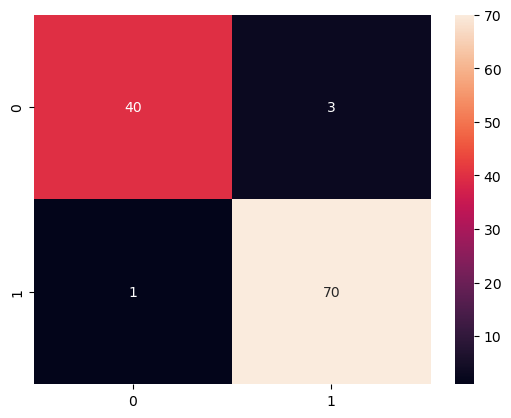

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [29]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_missing_imp = imp_mean.fit_transform(X_train_missing)

rfc = RandomForestClassifier(random_state=RANDOM_SEED)
rfc.fit(X_train_missing_imp, y_train)

print(accuracy_score(rfc.predict(X_test), y_test))

0.9473684210526315


<Axes: >

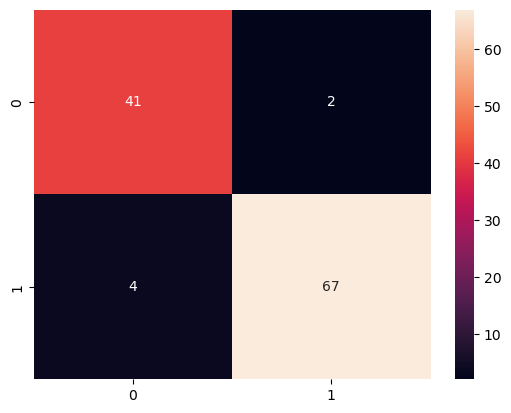

In [30]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), annot=True)

### Imputation impact on results for missing observations of 1%, 5% and 10%

In [33]:
def fit_model_and_compute_acc(X_train, X_test, y_train, y_test):
    if X_train.size == 0:
        return 0
    clf = RandomForestClassifier(random_state=RANDOM_SEED)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [34]:
# imputation impact on model performance for missing observations of 1%, 5% and 10%
missing_ratios = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

imputation_methods = ["simple imputation (mean)", "MICE"]

results = {
    "missing_data": [],
    "simple imputation (mean)": [],
    "MICE": [],
    "removal": []
}

for missing_ratio in missing_ratios:

    X_train_missing = introduce_missing_data(X_train, missing_ratio=missing_ratio)

    # Simple imputation
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train_missing)
    simple_accuracy = fit_model_and_compute_acc(X_train_imputed, X_test, y_train, y_test)

    # MICE
    imputer = IterativeImputer(random_state=RANDOM_SEED)
    X_train_imputed = imputer.fit_transform(X_train_missing)
    mice_accuracy = fit_model_and_compute_acc(X_train_imputed, X_test, y_train, y_test)
    

    # Removal approach
    X_train_dropped = X_train_missing.dropna(how='any')
    y_train_dropped = y_train[~X_train_missing.isnull().any(axis=1)]
    removal_accuracy = fit_model_and_compute_acc(X_train_dropped, X_test, y_train_dropped, y_test)

    # record results   
    results["missing_data"].append(missing_ratio)
    results["simple imputation (mean)"].append(simple_accuracy)    
    results["MICE"].append(mice_accuracy)
    results["removal"].append(removal_accuracy)

c:\Users\barto\anaconda3\envs\drpyEnv\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\barto\anaconda3\envs\drpyEnv\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\barto\anaconda3\envs\drpyEnv\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\barto\anaconda3\envs\drpyEnv\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\barto\anaconda3\envs\drpyEnv\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [35]:
# display the results in a table
results_df = pd.DataFrame(results)
results_df

,missing_data,simple imputation (mean),MICE,removal
0,0.01,0.964912,0.964912,0.964912
1,0.05,0.964912,0.964912,0.964912
2,0.10,0.964912,0.964912,0.929825
3,0.15,0.956140,0.964912,0.956140
4,0.20,0.956140,0.964912,0.622807
5,0.25,0.956140,0.964912,0.000000
6,0.30,0.982456,0.964912,0.000000
7,0.35,0.956140,0.964912,0.000000
8,0.40,0.956140,0.964912,0.000000
9,0.45,0.956140,0.964912,0.000000


In [44]:
SHOW_REMOVAL = True
show_removal = mr.Checkbox(label="Show removal", value=SHOW_REMOVAL)

mercury.Checkbox

Text(0.5, 1.0, 'Comparison of handling missing data methods')

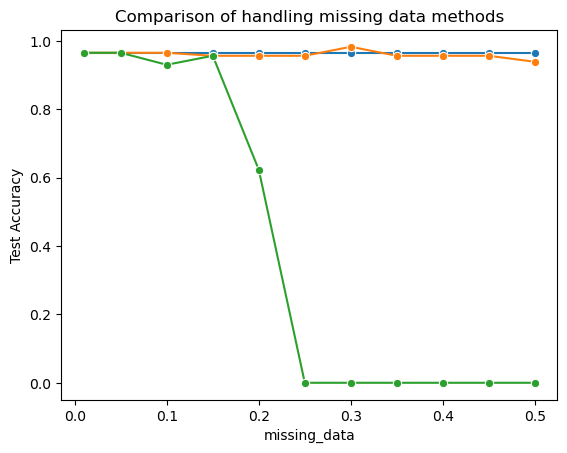

In [45]:
# create a checkbutton for enabling removal lineplot

sns.lineplot(data=results_df, x='missing_data', y='MICE', marker='o')
sns.lineplot(data=results_df, x='missing_data', y='simple imputation (mean)', marker='o')
if show_removal.value:
    sns.lineplot(data=results_df, x='missing_data', y='removal', marker='o')
plt.ylabel("Test Accuracy")
plt.title("Comparison of handling missing data methods")


## References

1. Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

2. Azur MJ, Stuart EA, Frangakis C, Leaf PJ. Multiple imputation by chained equations: what is it and how does it work? Int J Methods Psychiatr Res. 2011 Mar;20(1):40-9. doi: 10.1002/mpr.329. PMID: 21499542; PMCID: PMC3074241. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/

## Thank you for your attention! 🫶

In [ ]:
IFrame(src="https://giphy.com/embed/ZfK4cXKJTTay1Ava29", width="480", height="400")